In [1]:
import pandas as pd

import sys
sys.path.append(f"{PROJECT_DIR}/model/scripts/utils")

from train_utils import calc_metrics_for_pairs

In [2]:
df_anno = pd.read_table(f"{PROJECT_DIR}/dataset/transform/test_metalnet.tsv")
df_pred = pd.read_table("../../pred_pairs.tsv")

# from old version of metalnet, see https://github.com/wangchulab/MetalNet/tree/master/FINAL_automl_600_auc_diffmsa01
# msa_filter_type: hhfilter, num_seq: 64, coevo_threshold: 0.1, prob_threshold: 0.5, node_num_threshold: 1
df_pred_old = pd.read_table("../../pred_pairs_old_model.csv") 

### metrics

In [3]:
keys = ['f1', 'recall', 'precision']
perf = calc_metrics_for_pairs(df_anno, df_pred[df_pred['filter_by_graph'] == 1])
old_perf = calc_metrics_for_pairs(df_anno, df_pred_old[df_pred_old['pred'] == 1])
perf
old_perf

{'precision': 0.825595238095238,
 'recall': 0.7001514386673398,
 'f1': 0.7577164709095875}

{'precision': 0.6173212487411883,
 'recall': 0.618879353861686,
 'f1': 0.6180993193849256}

Text(0, 0.5, 'Value')

Text(0.5, 0, 'Metric')

([<matplotlib.axis.XTick at 0x7fdb2948f7f0>,
 [Text(0, 0, 'F1-score'), Text(1, 0, 'recall'), Text(2, 0, 'precision')])

(0.0, 1.0)

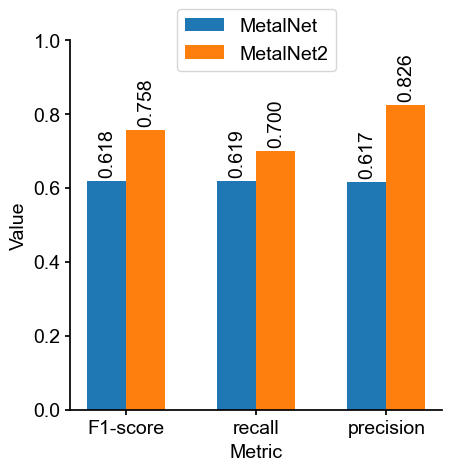

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use(f"{PROJECT_DIR}/asset/metalnet.mplstyle")

fig, ax = plt.subplots(figsize=(4.8, 4.8))
plt.ylabel("Value")
plt.xlabel("Metric")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
    
coor_x = np.arange(len(keys))
width = 0.3
rects_old = plt.bar(coor_x - width / 2, [old_perf[k] for k in keys], width=width)
for rect in rects_old:
    height = rect.get_height()
    text = plt.text(rect.get_x() + rect.get_width() / 2, height + 0.02, "{:.3f}".format(height), ha="center", rotation=90.)
rects_new = plt.bar(coor_x + width / 2, [perf[k] for k in keys], width=width)
for rect in rects_new:
    height = rect.get_height()
    text = plt.text(rect.get_x() + rect.get_width() / 2, height + 0.02, "{:.3f}".format(height), ha="center", rotation=90.)

keys_ = ['F1-score', 'recall', 'precision']
plt.xticks(coor_x, labels=keys_)

plt.ylim(bottom=0, top=1)
plt.legend(labels=['MetalNet',
                   'MetalNet2'],
           loc='center',
           bbox_to_anchor=(0.5, 1))
plt.savefig("./fig/comparasion_new_old.pdf", bbox_inches="tight", transparent=True)

### intersection (pred as true)

In [3]:
def get_pred_resi(df: pd.DataFrame):
    
    residues = set()
    for _, row in df.iterrows():
        residues.add((row['seq_id'], row['resi_seq_posi_2']))
        residues.add((row['seq_id'], row['resi_seq_posi_1']))
    return residues


new = get_pred_resi(df_pred[df_pred['filter_by_graph'] == 1])
old = get_pred_resi(df_pred_old[df_pred_old['pred'] == 1])
intersection = new & old

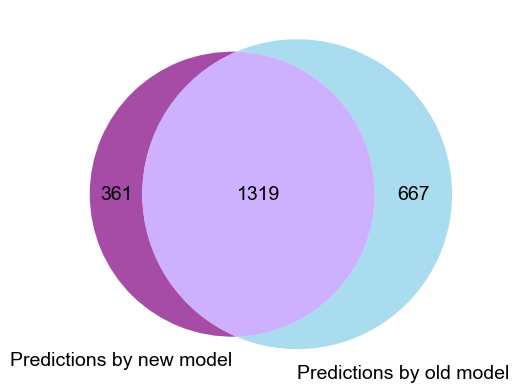

In [5]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = "Arial"

v = venn2(subsets=(
    len(new) - len(intersection), 
    len(old) - len(intersection), 
    len(intersection)
), 
    set_labels=('Predictions by new model', 'Predictions by old model'),
    set_colors=('purple', 'skyblue'),
    normalize_to=1,
    alpha=0.7)
for text in v.set_labels:
    text.set_fontsize(14)
for text in v.subset_labels:
    text.set_visible(True)
    text.set_fontsize(14)
# plt.savefig("venn_cys_pred_and_ssbond.pdf", bbox_inches="tight")